## Project set up
### Import libraries

In [524]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

### Import data

In [506]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
# data (as pandas dataframes) 
x = census_income.data.features 
y = census_income.data.targets  


In [507]:
## Comvert the json data into Dataframes
X = pd.DataFrame(x)
Y = pd.DataFrame(y)

## Data exploration
### Output variable exploration
First check if the output variable is balanced. This is done by computing the proportions of the categories

In [508]:
Y.value_counts() / len(Y)

income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
dtype: float64

Note that despite the output variable being binary, the database shows that the ouput variable has 4 observations. But in reality there are two, the only thing that produces such effect is the "." at the end of the variable. So it is essential to solve this problem as well as encoding `>50K` and `<=50K` as binary variables (1, 0).

In [509]:
Y.income = Y.income.apply(lambda x: 1 if x.replace('.', '') == '>50K' else 0 )

Now let's try again the method `.value_counts()` on the output variable

In [510]:
Y.value_counts() / len(Y)

income
0         0.760718
1         0.239282
dtype: float64

### Input variable selection

In [511]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [512]:
features = ['age', 'workclass', 'education',  'occupation', 'race', 'sex', 'capital-gain', 'capital-loss' ,'hours-per-week']

X[features]
X = pd.get_dummies(X[features], drop_first=True)

## Making the model

In [513]:
x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(),Y.to_numpy().flatten(), test_size=0.3)

In [514]:
X

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,50,0,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,38,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,53,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,0,0,40,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
48838,64,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
48839,38,0,0,50,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
48840,44,5455,0,40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [517]:
model = LogisticRegression(class_weight = 'balanced', C=0.05, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [525]:
y_pred = model.predict(x_test)


confusion_matrix(y_test, y_pred)

array([[8775, 2416],
       [ 845, 2617]])

ROC AUC score: 0.8577530760074235


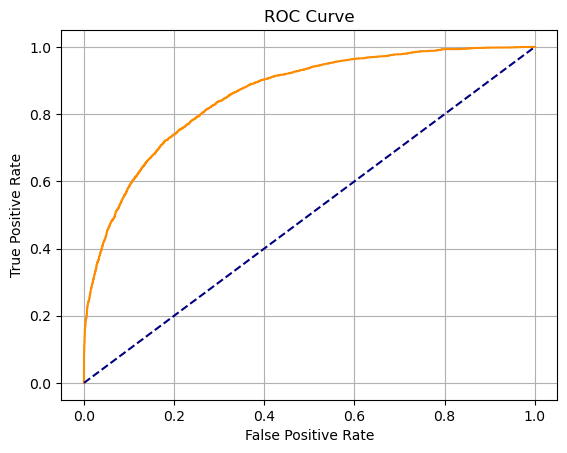

In [526]:
y_pred_prob = model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()